In [37]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [38]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'ELEKTRA.MX'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [39]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,1096.000000,1041.119995,1054.910034,1057.670044,141460.0,1049.540039
2019-03-21,1066.000000,1041.000000,1065.000000,1057.489990,76434.0,1049.361328
2019-03-22,1077.979980,1026.000000,1060.000000,1048.869995,91643.0,1040.807617
2019-03-25,1059.800049,1037.000000,1055.000000,1051.670044,173056.0,1043.586182
2019-03-26,1068.000000,1045.510010,1055.890015,1050.050049,154138.0,1041.978638


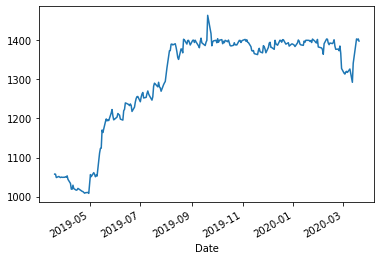

In [40]:
%matplotlib inline
data.Close.plot()

In [41]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [42]:
df = BBANDS(data,20)

In [43]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

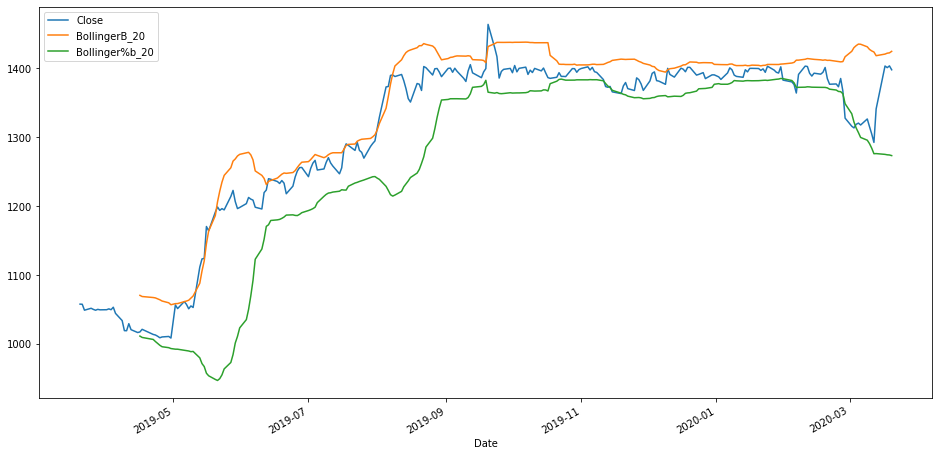

In [44]:
df2.plot(figsize = (16,8))

In [45]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [46]:
pd.set_option('display.max_rows', None)

In [47]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,1057.670044,Sin informacion,-
2019-03-21,1057.489990,Sin informacion,-
2019-03-22,1048.869995,Sin informacion,-
2019-03-25,1051.670044,Sin informacion,-
2019-03-26,1050.050049,Sin informacion,-
2019-03-27,1048.839966,Sin informacion,-
2019-03-28,1050.079956,Sin informacion,-
2019-03-29,1049.420044,Sin informacion,-
2019-04-01,1049.560059,Sin informacion,-
